# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [33]:
%pylab inline
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [34]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

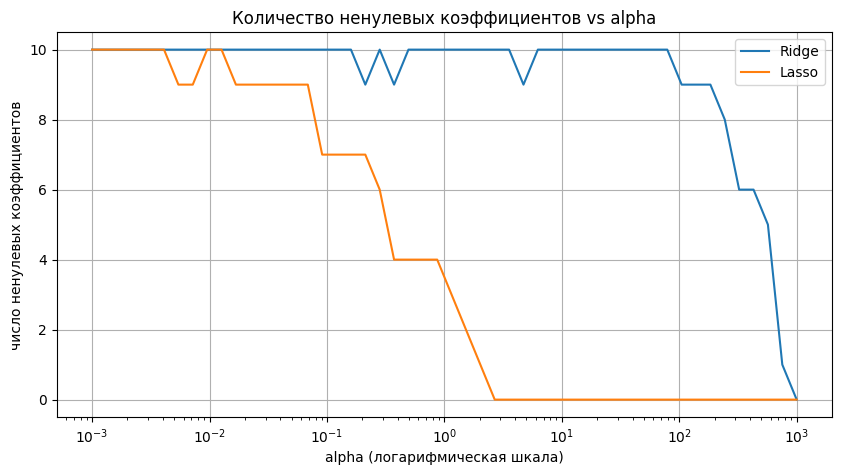

In [35]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
import numpy as np
delta = 9e-1
alphas = np.logspace(-3, 3, 50)
nonzero_counts_lasso = []
nonzero_counts_ridge = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    nonzero_counts_lasso.append(np.sum(np.abs(lasso.coef_) > delta))

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    nonzero_counts_ridge.append(np.sum(np.abs(ridge.coef_) > delta))

plt.figure(figsize=(10,5))
plt.plot(alphas, nonzero_counts_ridge, label='Ridge')
plt.plot(alphas, nonzero_counts_lasso, label='Lasso')
plt.xscale('log')
plt.xlabel('alpha (логарифмическая шкала)')
plt.ylabel('число ненулевых коэффициентов')
plt.title('Количество ненулевых коэффициентов vs alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [37]:
# code here
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R^2:  {r2:.4f}")

RMSE: 58.3043
MAE:  49.6028
R^2:  0.3599


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

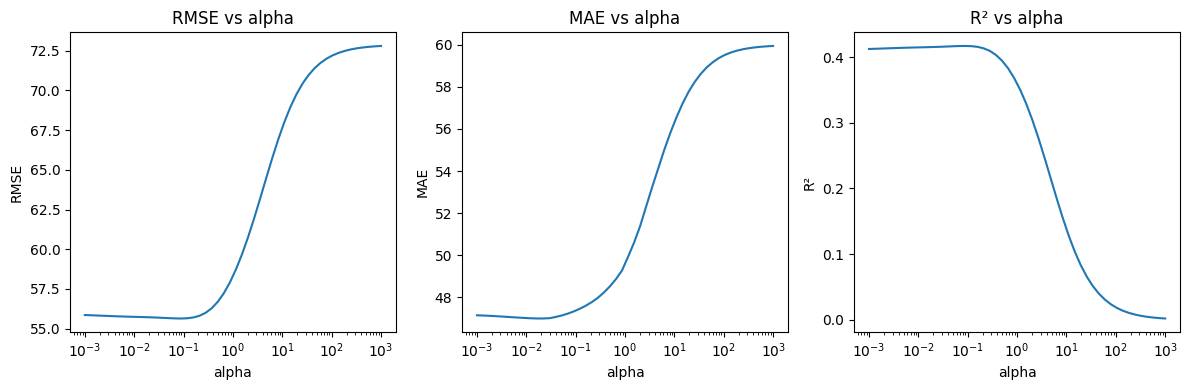

Best RMSE alpha: 0.09102981779915217 and RMSE: 55.6394
Best MAE alpha: 0.022229964825261943 and MAE: 47.0030
Best R2 alpha: 0.09102981779915217 and R2: 0.4171


In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np
alphas = np.logspace(-3, 3, 50)
rmse_list = []
mae_list = []
r2_list = []

for alpha in alphas:

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(alphas, rmse_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha')

plt.subplot(1,3,2)
plt.plot(alphas, mae_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE vs alpha')

plt.subplot(1,3,3)
plt.plot(alphas, r2_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.title('R² vs alpha')

plt.tight_layout()
plt.show()

best_RMSE_alpha = alphas[np.argmin(rmse_list)]
best_MAE_alpha = alphas[np.argmin(mae_list)]
best_R2_alpha = alphas[np.argmax(r2_list)]

print(f"Best RMSE alpha: {best_RMSE_alpha} and RMSE: {np.min(rmse_list):.4f}")
print(f"Best MAE alpha: {best_MAE_alpha} and MAE: {np.min(mae_list):.4f}")
print(f"Best R2 alpha: {best_R2_alpha} and R2: {np.max(r2_list):.4f}")


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [39]:
# code here


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [40]:
# code here

__Задание 3.__ Отчёт

**(2 балла)**

In [41]:
# code here